Встановлення необхідних бібліотек

In [37]:
%pip install -r "..\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


Імпорт бібліотек

In [87]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import timeit as ti
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import ListedColormap 

Завантаження датасету

In [6]:
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 

# data
X = individual_household_electric_power_consumption.data.features 
combined_data = pd.DataFrame(X)

combined_data.to_csv('household_power_consumption.csv', index=False)

d:\Documents\.venv\lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Створимо Pandas DataFrame

In [7]:
df = pd.read_csv('household_power_consumption.csv', delimiter=',', na_values='?', header=0, dtype={
    "Date": str,
    "Time": str,
    "Global_active_power": float,
    "Global_reactive_power": float,
    "Voltage": float,
    "Global_intensity": float,
    "Sub_metering_1": float,
    "Sub_metering_2": float,
    "Sub_metering_3": float
})

# об'єднаємо Date і Time в DateTime і вкажемо тип даних datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.insert(0, 'DateTime', df.pop('DateTime'))

df.dropna(inplace=True)

print(df.head())

             DateTime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


Створимо NumPy Array на основі Pandas DataFrame

In [8]:
nparr = df.to_numpy()

# Визначимо індекси масиву через змінні (для зручності роботи)
DateTime = 0
Global_active_power = 1
Global_reactive_power = 2
Voltage = 3
Global_intensity = 4
Sub_metering_1 = 5
Sub_metering_2 = 6
Sub_metering_3 = 7

print(df.columns)
print(nparr[:5])

Index(['DateTime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
[[Timestamp('2006-12-16 17:24:00') 4.216 0.418 234.84 18.4 0.0 1.0 17.0]
 [Timestamp('2006-12-16 17:25:00') 5.36 0.436 233.63 23.0 0.0 1.0 16.0]
 [Timestamp('2006-12-16 17:26:00') 5.374 0.498 233.29 23.0 0.0 2.0 17.0]
 [Timestamp('2006-12-16 17:27:00') 5.388 0.502 233.74 23.0 0.0 1.0 17.0]
 [Timestamp('2006-12-16 17:28:00') 3.666 0.528 235.68 15.8 0.0 1.0 17.0]]


Завдання першого рівня

1. Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [9]:
def df_high_power(df):
    return df[df['Global_active_power'] > 5]

def nparr_high_power(nparr):
    return nparr[nparr[:, Global_active_power] > 5]

def print_pd(func, arg):
    print("Pandas DataFrame")
    print(func(arg).head())
    pandas_time = ti.timeit(lambda: func(arg), number=1)
    print(f"Pandas DataFrame filter time: {pandas_time} seconds")

def print_nparr(func, arg):
    print("NumPy Array")
    print(func(arg))
    numpy_time = ti.timeit(lambda: func(arg), number=1)
    print(f"NumPy Array filter time: {numpy_time} seconds")

print_pd(df_high_power, df)
print("\n")
print_nparr(nparr_high_power, nparr)

Pandas DataFrame
              DateTime  Global_active_power  Global_reactive_power  Voltage  \
1  2006-12-16 17:25:00                5.360                  0.436   233.63   
2  2006-12-16 17:26:00                5.374                  0.498   233.29   
3  2006-12-16 17:27:00                5.388                  0.502   233.74   
11 2006-12-16 17:35:00                5.412                  0.470   232.78   
12 2006-12-16 17:36:00                5.224                  0.478   232.99   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0  
Pandas DataFrame filter time: 0.0055467000000248845 seconds


NumPy Array
[[Timest

2. Обрати всі записи, у яких вольтаж перевищую 235 В.

In [10]:
def df_high_voltage(df):
    return df[df['Voltage'] > 235]

def nparr_high_voltage(nparr):
    return nparr[nparr[:, Voltage] > 235]

print_pd(df_high_voltage, df)
print("\n")
print_nparr(nparr_high_voltage, nparr)


Pandas DataFrame
              DateTime  Global_active_power  Global_reactive_power  Voltage  \
4  2006-12-16 17:28:00                3.666                  0.528   235.68   
5  2006-12-16 17:29:00                3.520                  0.522   235.02   
6  2006-12-16 17:30:00                3.702                  0.520   235.09   
7  2006-12-16 17:31:00                3.700                  0.520   235.22   
14 2006-12-16 17:38:00                4.054                  0.422   235.24   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0  
Pandas DataFrame filter time: 0.16213310000000547 seconds


NumPy Array
[[Timestam

3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [11]:
def df_SM2_more_than_SM3(df):
    df_intensity_range = df[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)]
    return df_intensity_range[(df_intensity_range['Sub_metering_2']) > (df_intensity_range['Sub_metering_3'])]

def nparr_SM2_more_than_SM3(nparr):
    nparr_intensity_range = nparr[(nparr[:, Global_intensity] >= 19) & (nparr[:, Global_intensity] <= 20)]
    return nparr_intensity_range[nparr_intensity_range[:, Sub_metering_2] > nparr_intensity_range[:, Sub_metering_3]]

print_pd(df_SM2_more_than_SM3, df)
print("\n")
print_nparr(nparr_SM2_more_than_SM3, nparr)

Pandas DataFrame
               DateTime  Global_active_power  Global_reactive_power  Voltage  \
45  2006-12-16 18:09:00                4.464                  0.136   234.66   
460 2006-12-17 01:04:00                4.582                  0.258   238.08   
464 2006-12-17 01:08:00                4.618                  0.104   239.61   
475 2006-12-17 01:19:00                4.636                  0.140   237.37   
476 2006-12-17 01:20:00                4.634                  0.152   237.17   

     Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
45               19.0             0.0            37.0            16.0  
460              19.6             0.0            13.0             0.0  
464              19.6             0.0            27.0             0.0  
475              19.4             0.0            36.0             0.0  
476              19.4             0.0            35.0             0.0  
Pandas DataFrame filter time: 0.014306200000021363 seconds


NumPy Arr

4. Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [12]:
def df_random_sample_mean(df):
    random_indices = df.sample(n=500000, replace=False)
    return random_indices[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

def nparr_random_sample_mean(nparr):
    random_indices = nparr[np.random.choice(nparr.shape[0], 500000, replace=False)]
    return np.mean(random_indices[:, Sub_metering_1:Sub_metering_3+1], axis=0)

print_pd(df_random_sample_mean, df)
print("\n")
print_nparr(nparr_random_sample_mean, nparr)

Pandas DataFrame
Sub_metering_1    1.133106
Sub_metering_2    1.295572
Sub_metering_3    6.470204
dtype: float64
Pandas DataFrame filter time: 0.31695659999996906 seconds


NumPy Array
[1.110284 1.302124 6.452508]
NumPy Array filter time: 1.7264409 seconds


5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [13]:
def df_selection(df):
    # Відбираємо записи, які після 18.00
    after_18 = df[df['DateTime'].dt.hour >= 18]

    # понад 6 кВт за хвилину
    high_power = after_18[after_18['Global_active_power'] + after_18['Global_reactive_power']> 6]

    # група 2 є найбільшою
    group2_dominant = high_power[
        (high_power['Sub_metering_2'] > high_power['Sub_metering_1']) &
        (high_power['Sub_metering_2'] > high_power['Sub_metering_3'])
    ]

    # поділ на половини
    half = len(group2_dominant) // 2
    first_half = group2_dominant[:half]
    second_half = group2_dominant[half:]

    # кожен третій результат з першої половини
    every_third_first = first_half[::3]

    # кожен четвертий результат з другої половини
    every_fourth_second = second_half[::4]

    # об'єднання половин
    result = pd.concat([every_third_first, every_fourth_second])
    return result

def nparr_selection(nparr):
    hours = np.array([dt.hour for dt in nparr[:, DateTime]])
    after_18 = nparr[hours >= 18]

    high_power = after_18[after_18[:, Global_active_power] + after_18[:, Global_reactive_power] > 6]

    group2_dominant = high_power[
        (high_power[:, Sub_metering_2] > high_power[:, Sub_metering_1]) &
        (high_power[:, Sub_metering_2] > high_power[:, Sub_metering_3])
    ]

    half = len(group2_dominant) // 2
    first_half = group2_dominant[:half]
    second_half = group2_dominant[half:]

    every_third_first = first_half[::3]
    every_fourth_second = second_half[::4]
    result = np.concatenate((every_third_first, every_fourth_second), axis=0)
    return result

print_pd(df_selection, df)
print("\n")
print_nparr(nparr_selection, nparr)

Pandas DataFrame
                 DateTime  Global_active_power  Global_reactive_power  \
41    2006-12-16 18:05:00                6.052                  0.192   
44    2006-12-16 18:08:00                6.308                  0.116   
4495  2006-12-19 20:19:00                5.586                  0.424   
17497 2006-12-28 21:01:00                7.062                  0.270   
17500 2006-12-28 21:04:00                7.376                  0.238   

       Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
4495    236.01              23.8             0.0            35.0   
17497   235.76              30.2             2.0            65.0   
17500   234.67              31.4             1.0            72.0   

       Sub_metering_3  
41               17.0  
44               17.0  
4495              0.0  
17497            17.0  
17500          

Висновки
Для роботи з табличними данними я віддав би перевагу Pandas DataFrame, він зручніше у використанні та вже є призначенним для роботи з датасетами. NumPy Array має низку недоліків, проте, його зручніше використовувати, коли ми працюємо з індексами, і великими масивами числових даних, NumPy швидше справляється з числовими обчисленнями.

Недоліки NumPy Array:
- колонки не можуть мати назв, або ж нам треба це якось штучно вводити, а потім обходити, щоб при обробці масиву, не оброблялись назви колонок (якщо ми їх зробимо першим рядком(елементом) масиву). Тому, при виводі, ми не зможемо побачити як називаються колонки, що створює незручності при роботі з датасетом
- потрібно працювати з індексами, а не з назвами колонок, тому, для зручності, треба створювати словник, щоб ми могли працювати з назвами, а не з індексами
- Numpy Array має незручний для сприйняття вивід, при прінті виводяться тільки перші 3 і останні 3 "колонки" та 3 перші, 3 останні рядки. Pandas DataFrame виводить ВСІ колонки, перші 5 і останні 5 рядки, тому, pd зручініше, і надає при виводі повну і зрозумілішу інформацію
- Незручно видаляти або ж заміняти NaN, треба враховувати дуже багато деталей, тоді як в датафреймі це реалізується однією функцією
- не підтримує деякі типи даних, краще працює тільки з числовими даними
- час обробки довше в порівнянні з Pandas DataFrame, розглянемо на прикладі часу, необхідного на виконання завдання
1. NumPy Array: 0.1085 seconds, Pandas DataFrame: 0.0055 seconds;
2. NumPy Array: 0.4996 seconds, Pandas DataFrame: 0.1621 seconds;
3. NumPy Array: 0.1931 seconds, Pandas DataFrame: 0.0143 seconds;
4. NumPy Array: 1.7264 seconds, Pandas DataFrame: 0.317 seconds;
5. NumPy Array: 0.5771 seconds, Pandas DataFrame: 0.3425 seconds.

Бачимо, що NumPy Array місцями в рази повільніше, ніж Pandas DataFrame

Зручність виконання операцій відбору в NumPy Array я оцінив би на 2/5, оскільки в процесі можуть виникнути суттєві проблеми через особливості роботи з цим масивом, і для зручності треба робити зайві дії, наприклад, щоб працювати з назвами колонок, а не з індексами, нам потрібно створити словник назва - індекс, тоді як в df ми одразу працюємо з колонками, і передбачені табличні операції, тоді як в NumPy Array треба ще подумати, як їх реалізувати

Зручність виконання операцій відбору в NumPy Array я оцінив би на 4/5, можна було б спростити синтасис моментами, але, в цілому Pandas DataFrame і призначений для виконання операцій відбору, тому, вони реалізовані відносно зручно

Завдання другого рівня

Завантаження датасету

In [14]:
# fetch dataset 
automobile = fetch_ucirepo(id=10)

# data 
X = automobile.data.features 
combined_data = pd.DataFrame(X)

combined_data.to_csv('automobile.csv', index=False)

df = pd.read_csv('automobile.csv')
print(df)

nparr = df.to_numpy()
print(nparr)

       price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-s

1. Поборотися із зниклими даними. Для цього подивитись https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

In [15]:
df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

Рядки з відсутніми даними про ціну, кінські сили краще видалити, наближення до середнього або ж медіани може зіпсувати якість результатів обробки, їх не так багато. В peak-rpm, bore і stroke можемо імпутувати середні значення, оскільки ці дані коливаються в невеликому визначеному діапазоні, і це не сильно вплине на результуючу модель. num-of-doors можна замінити за модою, бо, зазвичай, у автомобілях 4 або 2 двері. В normalized-losses дуже багато NaN, тому, нам краще або ж видалити цей рядок, або ж замінити на некоректні значення, наприклад, -1, щоб навчальна модель могла зрозуміти, що ці дані несправжні. Середнє/медіану краще не використовувати, бо великий діапазон можливих даних. Цей стовпчик - це середні втрати на автомобіль за рік. Ці дані можуть бути важливими, тому, я вирішив замінити пропущенні значення на -1

In [47]:
# видалення NaN в price i horsepower
df = df.dropna(subset=['price', 'horsepower'])

# заповнення за середнім
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())
df['bore'] = df['bore'].fillna(df['bore'].mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())

# заповнення за модою
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

# замінюємо пропущені значення на -1
df['normalized-losses'] = df['normalized-losses'].fillna(-1)

print(df)

# NumPy Array
cols = {
    "price": 0,
    "highway-mpg": 1,
    "city-mpg": 2,
    "peak-rpm": 3,
    "horsepower": 4,
    "compression_ratio": 5,
    "stroke": 6,
    "bore": 7,
    "fuel-system": 8,
    "engine-size": 9,
    "num-of-cylinders": 10,
    "engine-type": 11,
    "curb-weight": 12,
    "height": 13,
    "width": 14,
    "length": 15,
    "wheel-base": 16,
    "engine-location": 17,
    "drive-wheels": 18,
    "body-style": 19,
    "num-of-doors": 20,
    "aspiration": 21,
    "fuel-type": 22,
    "make": 23,
    "normalized-losses": 24
}
numeric_columns = [cols["price"], cols["peak-rpm"], cols["horsepower"], cols["stroke"], cols["bore"], cols["num-of-doors"], cols["normalized-losses"]]

nparr_fixed = nparr.copy()
for col in numeric_columns:
    for i in range(nparr_fixed.shape[0]):
        try:
            nparr_fixed[i, col] = float(nparr_fixed[i, col])
        except:
            nparr_fixed[i, col] = np.nan

numeric_data = nparr_fixed[:, numeric_columns].astype(float)

# видалення NaN в price i horsepower
nparr_clean = numeric_data[~np.isnan(numeric_data[:, 0]) & ~np.isnan(numeric_data[:, 2])]
mask_valid = ~np.isnan(numeric_data[:, 0]) & ~np.isnan(numeric_data[:, 2])
clean_data = numeric_data[mask_valid]

# заповнення за середнім
for col in [1, 3, 4]:
    mean_val = np.nanmean(clean_data[:, col])
    numeric_data[:, col] = np.where(np.isnan(numeric_data[:, col]), mean_val, numeric_data[:, col])

# заповнення за модою
vals, counts = np.unique(clean_data[~np.isnan(clean_data[:, 5]), 5], return_counts=True)
mode_val = vals[np.argmax(counts)]
numeric_data[:, 5] = np.where(np.isnan(numeric_data[:, 5]), mode_val, numeric_data[:, 5])

# замінюємо пропущені значення на -1
numeric_data[:, 6] = np.where(np.isnan(numeric_data[:, 6]), -1, numeric_data[:, 6])

for i, col in enumerate(numeric_columns):
    nparr_fixed[:, col] = numeric_data[:, i]

nparr_final = nparr_fixed[mask_valid]

print(nparr_final)

       price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-s

2. Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [17]:
def df_normalize(df):
    norm_df = df.copy()
    for col in norm_df.columns:
        if pd.api.types.is_numeric_dtype(norm_df[col]):
            min_val = norm_df[col].min()
            max_val = norm_df[col].max()
            if max_val != min_val:
                norm_df[col] = (norm_df[col] - min_val) / (max_val - min_val)
            else:
                norm_df[col] = 0
    return norm_df

def nparr_normalize(data):
    data = np.array(data)
    norm_data = data.copy()

    for i in range(norm_data.shape[1]):
        try:
            col = norm_data[:, i].astype(float)
            min_val = np.min(col)
            max_val = np.max(col)
            if max_val != min_val:
                norm_col = (col - min_val) / (max_val - min_val)
            else:
                norm_col = np.zeros_like(col)
            norm_data[:, i] = norm_col.astype(str)  # зберігаємо як str для узгодженості типів
        except ValueError:
            continue  # нечислові стовпці пропускаємо

    return norm_data


normalized_df = df_normalize(df)
print("Normalized DataFrame:\n", normalized_df)
normalized_nparr = nparr_normalize(nparr_final)
print("Normalized Array:\n", normalized_nparr)

Normalized DataFrame:
         price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    0.207959     0.289474  0.222222  0.346939    0.294393            0.12500   
1    0.282558     0.289474  0.222222  0.346939    0.294393            0.12500   
2    0.282558     0.263158  0.166667  0.346939    0.495327            0.12500   
3    0.219254     0.368421  0.305556  0.551020    0.252336            0.18750   
4    0.306142     0.157895  0.138889  0.551020    0.313084            0.06250   
..        ...          ...       ...       ...         ...                ...   
200  0.291123     0.315789  0.277778  0.510204    0.308411            0.15625   
201  0.345738     0.236842  0.166667  0.469388    0.523364            0.10625   
202  0.406311     0.184211  0.138889  0.551020    0.401869            0.11250   
203  0.430763     0.289474  0.361111  0.265306    0.271028            1.00000   
204  0.434611     0.236842  0.166667  0.510204    0.308411            0.15625   

    

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

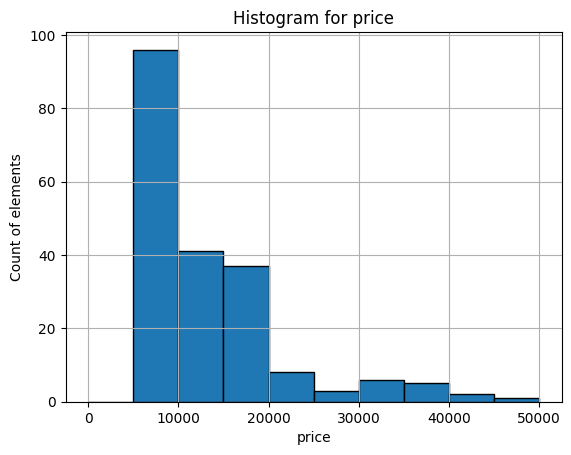

In [26]:
def plot_histogram_df(df, column_name, bins):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame")
        return
    
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Column '{column_name}' is not numeric")
        return
    
    plt.hist(df[column_name], bins=bins, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Count of elements')
    plt.title(f'Histogram for {column_name}')
    plt.grid(True)
    plt.show()

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000] # діапазони для ціни
plot_histogram_df(df, 'price', bins)

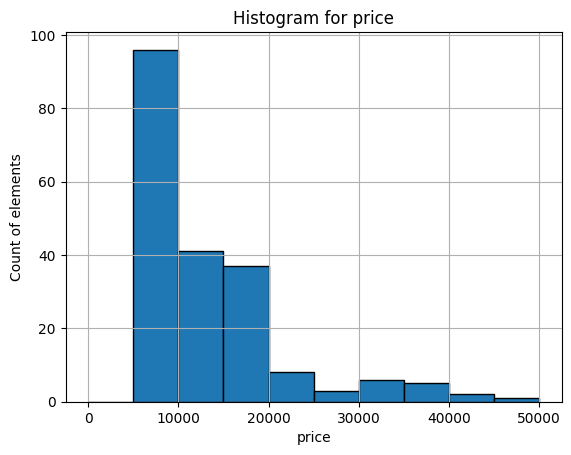

In [27]:
def plot_histogram_nparr(nparr, col_index, bins, col_names=None):
    try:
        data = nparr[:, col_index].astype(float)
    except ValueError:
        print("The column contains non-numeric values")
        return
    
    if col_names:
        # Пошук назви колонки за індексом
        name = next((k for k, v in col_names.items() if v == col_index), None)
        if name:
            label = name
    else:
        print("Column not found")
        return

    plt.hist(data, bins=bins, edgecolor='black')
    plt.xlabel(f'{label}')
    plt.ylabel('Count of elements')
    plt.title(f'Histogram for {label}')
    plt.grid(True)
    plt.show()

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
plot_histogram_nparr(nparr_final, 0, bins, cols)

4. Збудувати графік залежності одного integer/real атрибута від іншого.

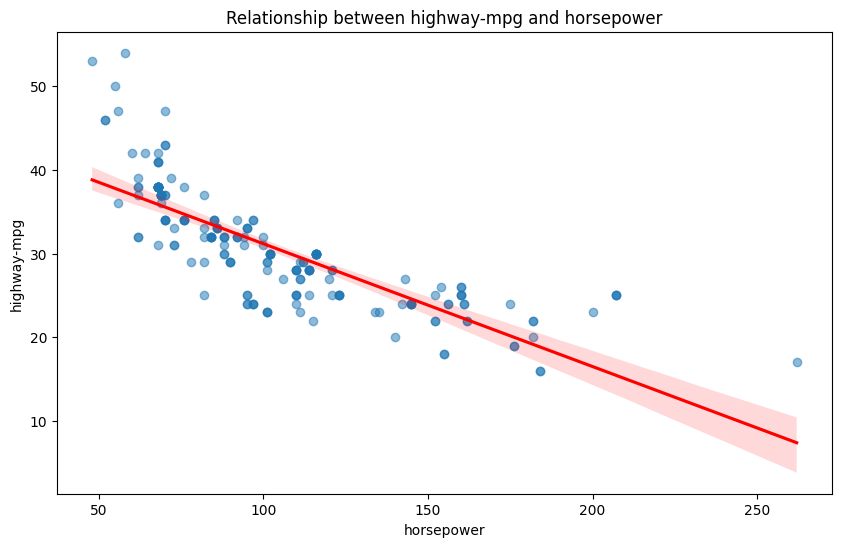

In [28]:
def plot_regression(df, x, y):
    if x not in df.columns:
        print(f"Column '{x}' not found in DataFrame")
        return
    elif y not in df.columns:
        print(f"Column '{y}' not found in DataFrame")
        return
    if not pd.api.types.is_numeric_dtype(df[x]):
        print(f"Column '{x}' is not numeric")
        return
    elif not pd.api.types.is_numeric_dtype(df[y]):
        print(f"Column '{y}' is not numeric")
        return
    
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=x, y=y, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title(f'Relationship between {y} and {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

plot_regression(df, 'horsepower', 'highway-mpg')

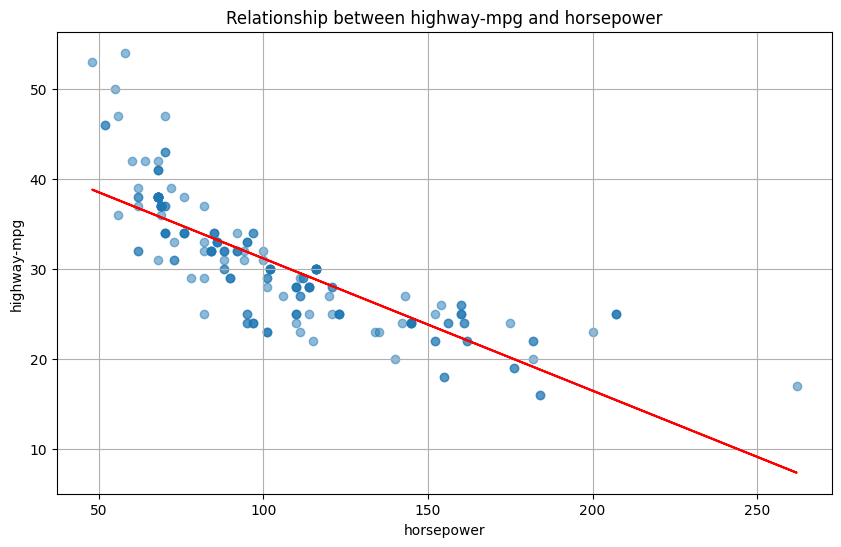

In [29]:
def plot_regression_nparr(nparr, x, y, col_names=None):
    try:
        x_data = nparr[:, x].astype(float)
        y_data = nparr[:, y].astype(float)
    except ValueError:
        print("The columns contains non-numeric values")
        return

    # Розрахунок коефіцієнтів лінії регресії (y = a * x + b)
    a, b = np.polyfit(x_data, y_data, 1)
    y_pred = a * x_data + b

    if col_names:
        for k, v in col_names.items():
            if v == x:
                x = k
            if v == y:
                y = k
    else:
        print("One or both columns not found")
        return

    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, alpha=0.5, label='Data')
    plt.plot(x_data, y_pred, color='red', label='Regression Line')
    plt.title(f'Relationship between {y} and {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

plot_regression_nparr(nparr_final, cols['horsepower'], cols['highway-mpg'], col_names=cols)

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [31]:
def calculate_pearson_nparr(nparr, x, y):
    try:
        x_data = nparr[:, x].astype(float)
        y_data = nparr[:, y].astype(float)
    except ValueError:
        print("The columns contains non-numeric values")
        return
    
    pearson_corr = np.corrcoef(x_data, y_data)[0, 1]
    return pearson_corr

def calculate_spearman_nparr(nparr, x, y):
    try:
        x_data = nparr[:, x].astype(float)
        y_data = nparr[:, y].astype(float)
    except ValueError:
        print("The columns contains non-numeric values")
        return

    spearman_corr, _ = spearmanr(x_data, y_data)
    return spearman_corr

pearson_corr = calculate_pearson_nparr(nparr_final, cols['horsepower'], cols['highway-mpg'])
spearman_corr = calculate_spearman_nparr(nparr_final, cols['horsepower'], cols['highway-mpg'])

print(f"Pearson's Coefficient: {pearson_corr}")
print(f"Spearman's Coefficient: {spearman_corr}")

Pearson's Coefficient: -0.8045960570124875
Spearman's Coefficient: -0.8866179802981321


In [32]:
def calculate_pearson_df(df, x, y):
    if x not in df.columns:
        print(f"Column '{x}' not found in DataFrame")
        return
    elif y not in df.columns:
        print(f"Column '{y}' not found in DataFrame")
        return
    if not pd.api.types.is_numeric_dtype(df[x]):
        print(f"Column '{x}' is not numeric")
        return
    elif not pd.api.types.is_numeric_dtype(df[y]):
        print(f"Column '{y}' is not numeric")
        return
    
    x = df[x]
    y = df[y]
    pearson_corr, _ = pearsonr(x, y)
    return pearson_corr

def calculate_spearman_df(df, x, y):
    if x not in df.columns:
        print(f"Column '{x}' not found in DataFrame")
        return
    elif y not in df.columns:
        print(f"Column '{y}' not found in DataFrame")
        return
    if not pd.api.types.is_numeric_dtype(df[x]):
        print(f"Column '{x}' is not numeric")
        return
    elif not pd.api.types.is_numeric_dtype(df[y]):
        print(f"Column '{y}' is not numeric")
        return
    
    x = df[x]
    y = df[y]
    spearman_corr, _ = spearmanr(x, y)
    return spearman_corr

pearson_corr = calculate_pearson_df(df, 'horsepower', 'highway-mpg')
spearman_corr = calculate_spearman_df(df, 'horsepower', 'highway-mpg')

print(f"Pearson's Coefficient: {pearson_corr}")
print(f"Spearman's Coefficient: {spearman_corr}")

Pearson's Coefficient: -0.8045960570124878
Spearman's Coefficient: -0.8866179802981321


6. Провести One Hot Encoding категоріального string атрибуту.

In [45]:
def one_hot_encode_column(df, column_name):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame")
        return
    
    encoder = OneHotEncoder(sparse_output=False) # Створюємо енкодер
    encoded_data = encoder.fit_transform(df[[column_name]]) # Трансформуємо колонку

    # Отримуємо назви нових колонок з унікальних значень
    encoded_cols = [f"{column_name}_{cat}" for cat in encoder.categories_[0]]

    encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)

    result_df = pd.concat([df, encoded_df], axis=1) # Об'єднуємо оригінальний DataFrame з новими колонками

    return result_df

encoded_df = one_hot_encode_column(df, 'body-style')
print(encoded_df)

       price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-s

In [48]:
def one_hot_encode_nparr(arr, col_index):
    encoder = OneHotEncoder(sparse_output=False)
    column_to_encode = arr[:, col_index].reshape(-1, 1)  # Перетворюємо колонку в 2D масив
    encoded_data = encoder.fit_transform(column_to_encode)
    encoded_cols = [f"col{col_index}_{val}" for val in encoder.categories_[0]]
    arr = np.delete(arr, col_index, axis=1)  # Видаляємо оригінальну колонку з nparr
    result_arr = np.hstack([arr, encoded_data])  # об'єднуємо
    return result_arr, encoded_cols

encoded_nparr, encoded_cols = one_hot_encode_nparr(nparr_final, cols['body-style'])
print(encoded_nparr)
print(encoded_cols)

[[13495.0 27 21 ... 0.0 0.0 0.0]
 [16500.0 27 21 ... 0.0 0.0 0.0]
 [16500.0 26 19 ... 1.0 0.0 0.0]
 ...
 [21485.0 23 18 ... 0.0 1.0 0.0]
 [22470.0 27 26 ... 0.0 1.0 0.0]
 [22625.0 25 19 ... 0.0 1.0 0.0]]
['col19_convertible', 'col19_hardtop', 'col19_hatchback', 'col19_sedan', 'col19_wagon']


7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

2D 

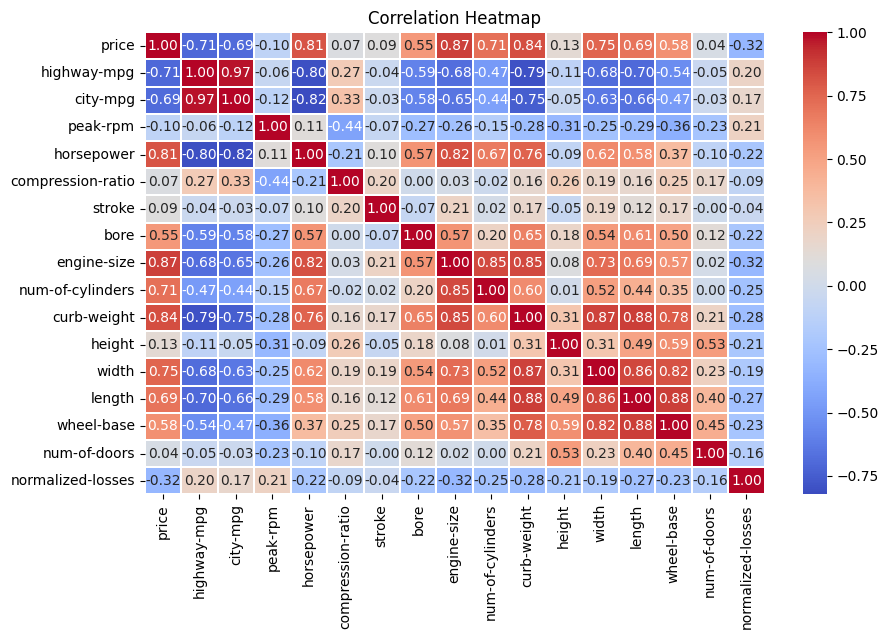

In [51]:
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()

# Побудова heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Heatmap")
plt.show()

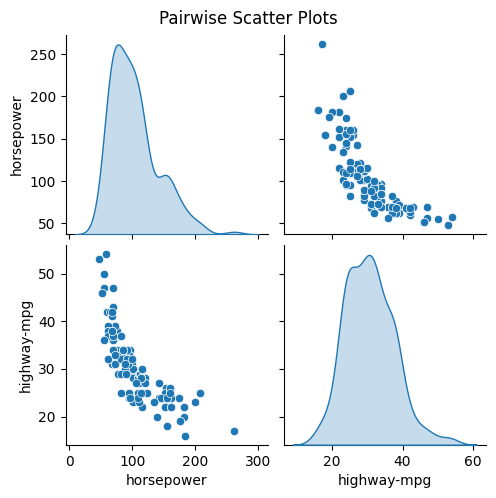

In [74]:
cols = ['horsepower', 'highway-mpg'] # Вибір колонок для парних графіків 
sns.pairplot(df[cols], diag_kind="kde")
plt.suptitle("Pairwise Scatter Plots", fontsize=12)
plt.subplots_adjust(top=0.93)
plt.show()

Text(0.5, 1.0, 'Relationship between Horsepower and Engine Size')

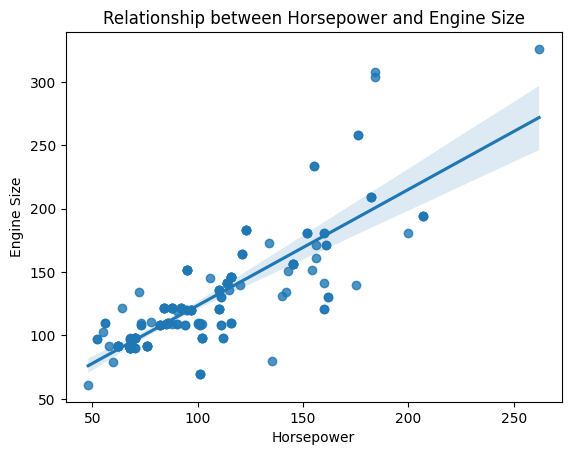

In [73]:
sns.regplot(x='horsepower', y='engine-size', data=df)
plt.xlabel('Horsepower')
plt.ylabel('Engine Size')
plt.title('Relationship between Horsepower and Engine Size')

3D

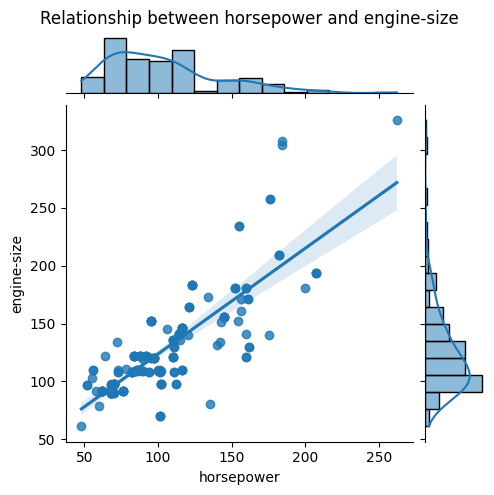

In [76]:
sns.jointplot(x='horsepower', y='engine-size', data=df, kind='reg', height=5)
plt.suptitle("Relationship between horsepower and engine-size")
plt.subplots_adjust(top=0.93)
plt.show()

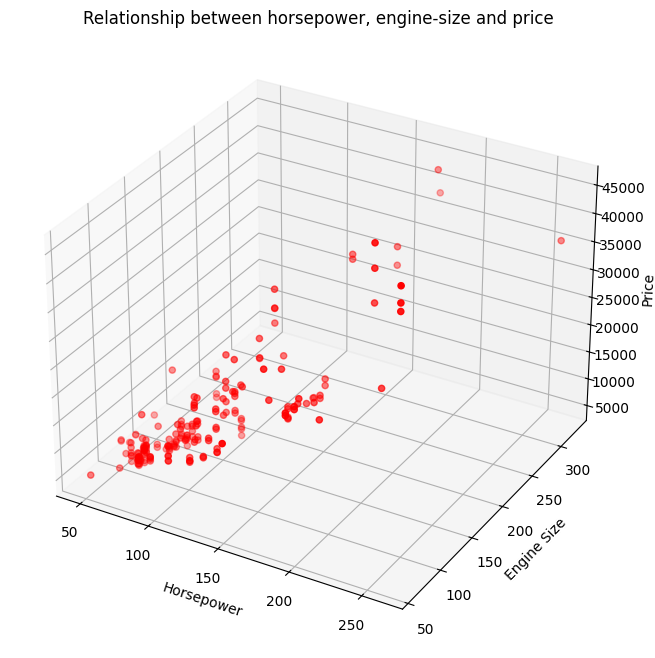

In [83]:
# створення 3D графіку
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# вибираємо колонки
xs = df['horsepower']
ys = df['engine-size']
zs = df['price']

# Побудова точок
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Engine Size')
ax.set_zlabel('Price')

plt.title("Relationship between horsepower, engine-size and price")
plt.show()

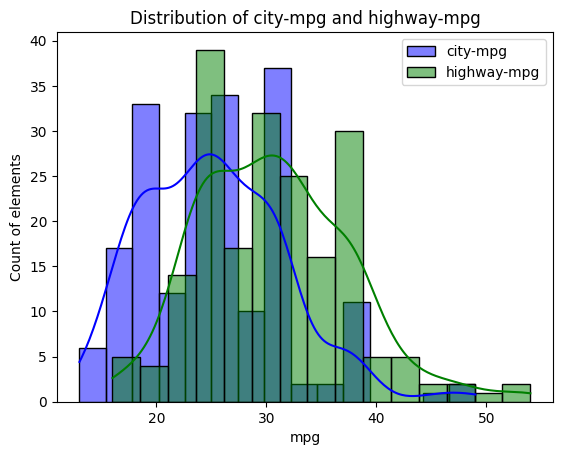

In [84]:
sns.histplot(df['city-mpg'], kde=True, bins=15, color='blue', label="city-mpg")
sns.histplot(df['highway-mpg'], kde=True, bins=15, color='green', label="highway-mpg")
plt.xlabel('mpg')
plt.ylabel('Count of elements')
plt.legend()
plt.title("Distribution of city-mpg and highway-mpg")
plt.show()

4D

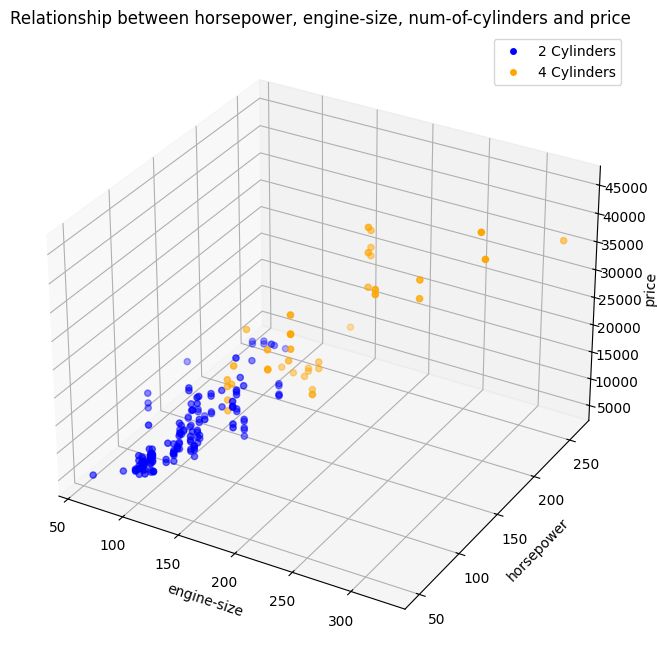

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Вибір колонок
xs = df['engine-size']
ys = df['horsepower']
zs = df['price']
df['num-of-cylinders'] = df['num-of-cylinders'].astype('category') 
colors = df['num-of-cylinders'].cat.codes  # Кодування категорій для кольорів (0 для 2 циліндрів, 1 для 4)

# Створюємо палітру для 2 кольорів (для 2 і 4 циліндрів)
cmap = ListedColormap(['blue', 'orange'])

scatter = ax.scatter(xs, ys, zs, c=colors, cmap=cmap, marker='o')

ax.set_xlabel('engine-size')
ax.set_ylabel('horsepower')
ax.set_zlabel('price')

# Заголовок
plt.title("Relationship between horsepower, engine-size, num-of-cylinders and price")

# Додаємо легенду
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange')],
                    labels=['2 Cylinders', '4 Cylinders'])

# Показуємо графік
plt.show()